In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import pickle

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15) 

C:\Users\agiedd\Anaconda2\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
file1 = open("qcd_100000_pt_1000_1200.pkl", 'rb')
data1 = pickle.load(file1)
file2 = open("higgs_100000_pt_1000_1200.pkl", 'rb')
data2 = pickle.load(file2)

In this lab we will be analyzing simulated data from a 2 proton collision in order to detect Higgs Boson signals. Particles are created after other parent particles are accelerated through a ring and collided. To explore the simulated data of the Large Hedron Collider we will plot each of the signal variables against their corresponding background (QCD) values. By plotting the QCD values against the signal values we can determine discrimination power and/or correlation between the two data sets. We specifically will be analyzing jets, a group of particles all moving in one same direction towards a detector. These jets originate from particle decay and allow us to examine the lifetime of a particle using 4 momentum. Because jets cannot be distinguished, we will be examining the decay of 2-3 prong jets and their relationship.

Variables we will examine:
pt: transverse momentum (transverse to the direction of the beams)

eta: pseudorapidity defined as $ ln(\cot(\frac{\theta}{2})) $

phi: azimuthal angle around beam

mass: mass in GeV

ee2: energy correlations between 2 jets

ee3: energy correlations between 3 jets

d2: two prong jet disriminant, calculated by $ (\frac{ee_2}{ee_3})^3 $

angularity: describes shape of the jet

t1: (subjettiness) variance of detections for 1 branch coming from a jet

t2: variance of detections for 2 branches coming from a jet

t3: variance of detections for 3 branches coming from a jet

t21: ratio of t2 and t1

t32: ratio of t3 and t2

KtDeltaR: size difference between two sub jets

In [4]:
data1.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

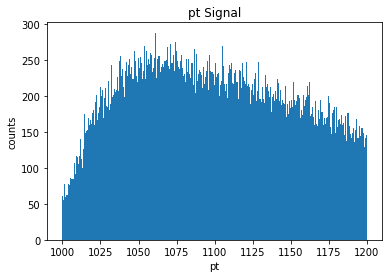

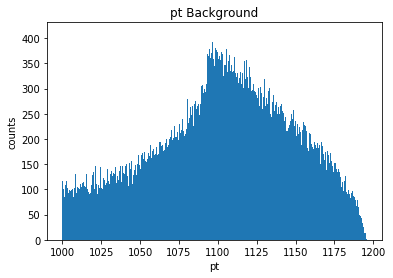

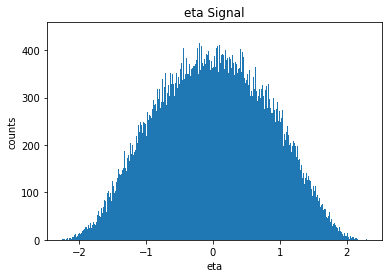

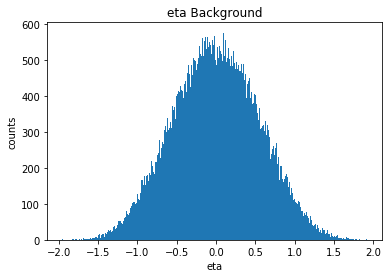

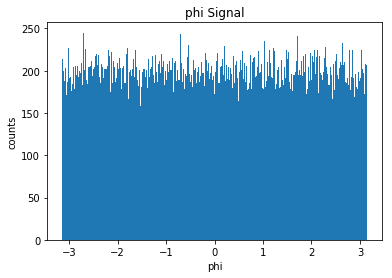

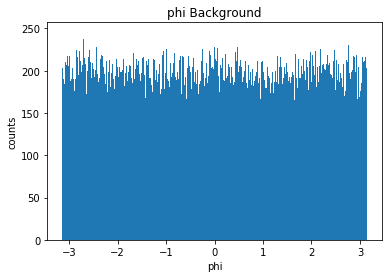

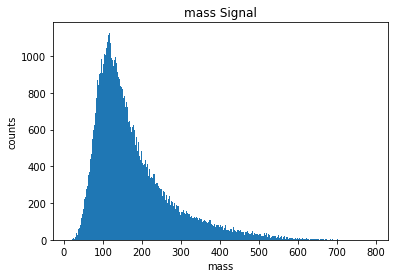

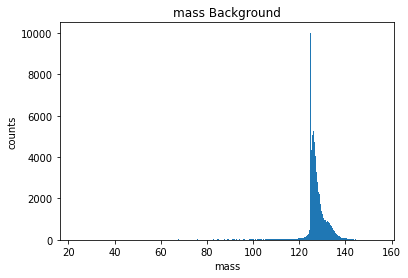

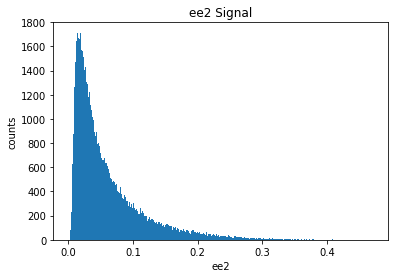

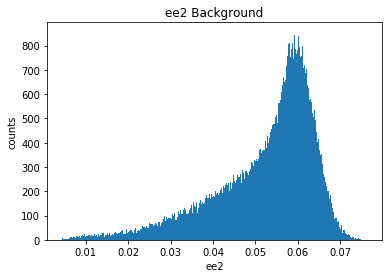

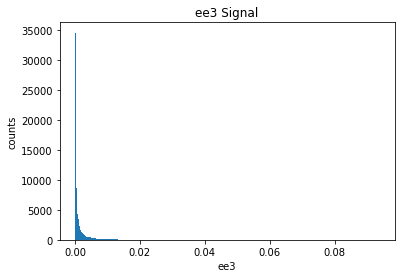

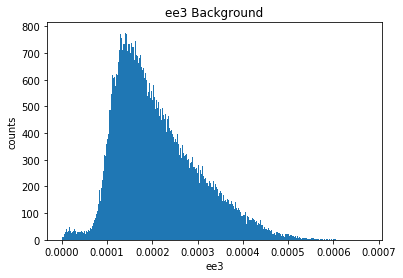

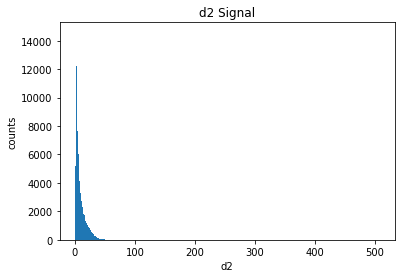

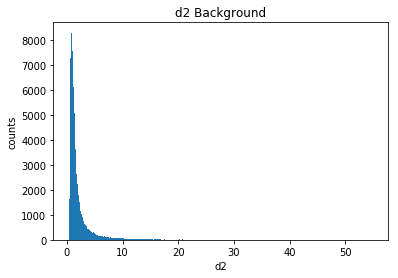

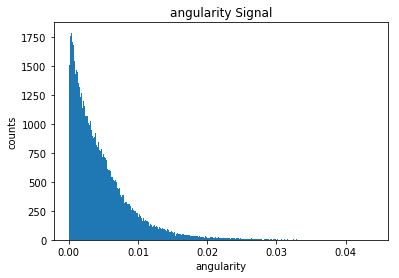

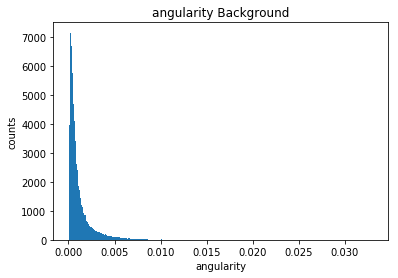

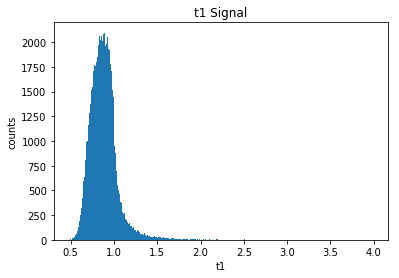

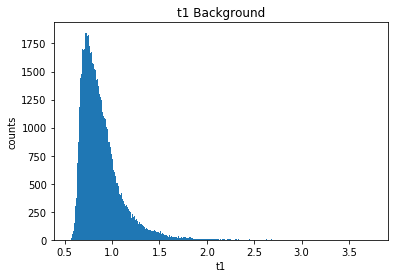

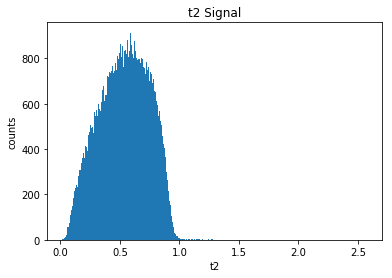

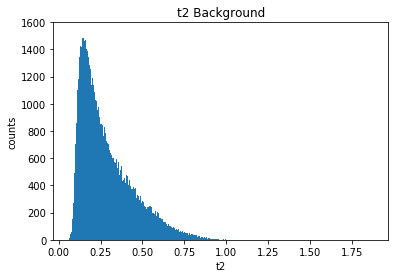

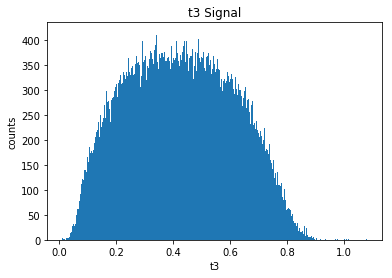

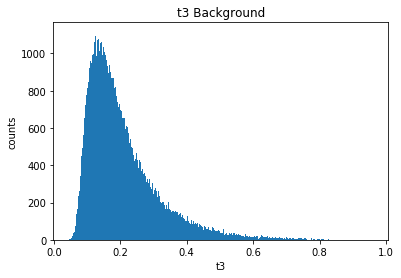

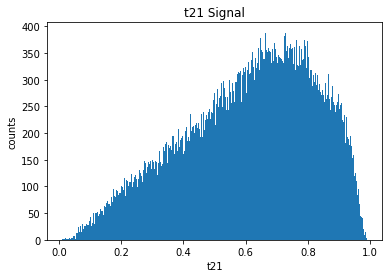

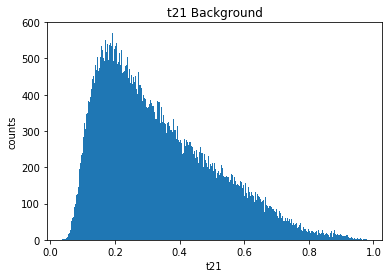

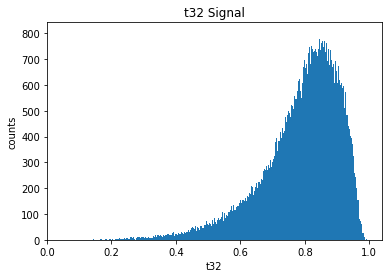

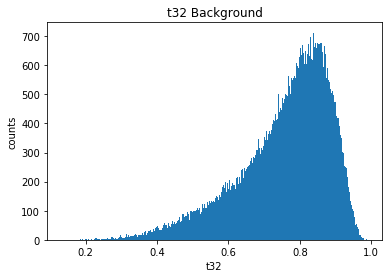

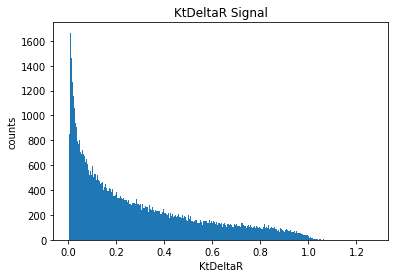

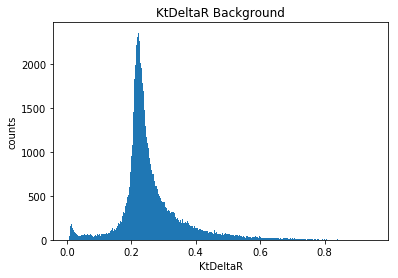

In [10]:
for key in data1.keys():
    plt.hist(data1[key], bins = 500)
    plt.title(key + " Signal")
    plt.ylabel("counts")
    plt.xlabel(key)
    plt.show()
    
    plt.hist(data2[key], bins = 500)
    plt.title(key + " Background")
    plt.ylabel("counts")
    plt.xlabel(key)
    plt.show()

#### Do all features provide discrimination power between signal and background?

eta, d1, angularity, and t1 have similar distributions to their background signals, thus complicating their discrimination. However, all other variables present sufficient differences between signal and background.

#### Are there correlations among these features?
$t_n$ and $t_{i, j}$ are related through ratio, t2 and t3 are similar in shape, and ee2, ee3, ktDeltaR also express similarity in their shapes. Furthermore, based on previous definitions of variables, we know ee2 and ee3 are dependent upon d2.

#### Compute the expected discovery sensitivity (significance of the expected signal) by normalizing each sample appropriately (see 'expected yields' below).
From the expected yields of our dataset, we expect that 2000 jets should result in 50 true signals: $N_{Higgs} = 50$ and $N_{QCD} = 2000$. Due to the discrete and independent nature of the signals, we expct a Poisson distrition of $\lambda = 2000$ jets. The sum  $\lambda + N_{Higgs}$ should produce the expected Higgs Boson signal.

In [15]:
lam = 2000
signal = 2050

probability = stats.poisson.sf(signal, lam)
sigma = stats.norm.isf(probability)
print("The significance of a 2000 jet signal is", sigma, "sigma.")

target_sigma = 5
new_prob = stats.norm.sf(target_sigma)
target_signal = stats.poisson.isf(new_prob, lam)
print("Jets needed for 5 sigma discovery:", target_signal)

probability = stats.poisson.sf(target_signal, lam)
sigma = stats.norm.isf(probability)
print("Sigma corresponding to", target_signal, ":" , sigma)

The significance of a 2000 jet signal is 1.1282230087754423 sigma.
Jets needed for 5 sigma discovery: 2228.0
Sigma corresponding to 2228.0 : 5.020141370651767


The sigma produced by a 2000 jet signal is rather low, so by finding the jets needed for a 5 sigma discovery we can determine the data needed for a significant discovery, which in this case is 2228

#### Develop a plan to optimize the discovery sensitivity by applying selections to these features.
By isolating the background signal, we can establish which portions of the collected signal to remove. To determine which data is most representative of the signal, we can cut portions where there is low background, which will help us further distinguish signal from noise. By isolating these regions of low background and establishing a baseline, we can find areas with higher discovery sensitivity.

In [14]:
# Pick angle and compaore poisson distribution at that angle in the signal to the poisson distribution at that angle in the 
# background